# Homework 2: Sampling Error and Bias

## Introduction

The outcome of the US presidential election in 2016 took many people and many pollsters by surprise. In this assignment we will carry out a simulation study / post mortem in an attempt to understand what happened.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Latex, Markdown

## `SciPy` and `special` ##

Factorials and the *binomial coefficients* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ get large very quickly as $n$ gets large. One way to compute them is to use the `SciPy` module `special`. `SciPy` is a collection of Python-based software for math, probability, statistics, science, and engineering.

In [2]:
from scipy import special

## Question 1 ##

### Question 1a) ###
Suppose you sample 100 times at random with replacement from a population in which 26% of the individuals are called "successes" (that's traditional terminology in probability). Write a Python expression that evaluates to the chance that the sample has 20 successes. 

**Computational note:** Don't import any other libraries; just use the ones already imported and plug into the formula above. It's far from the best way numerically, but it is fine for the numbers involved in this Homework. We will address issues of numerical accuracy later in the course.

**Checking your answer:** In Homework 1 Question 6c, you simulated the distribution of the number of successes. You should use that to check whether your answer looks reasonable. 

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 1
-->

In [3]:
# n comb k . 0.26^20 . (1-0.26)^80
# [100! / (20! . 80!)] . 0.26^20 . (1-0.26)^80
n = 100
k = 20
p = 0.26
x = 20
pr_20s = (special.factorial(100) / (special.factorial(20)*special.factorial(80))) * (p ** x) * ((1 - p) ** (n - k))
pr_20s

0.036911003560024

### Question 1b) ###
Complete the cell with a Python expression that evaluates to an array whose elements are the chances of $k$ successes for $k = 0, 1, 2, \ldots, 100$. You should check that the array looks consistent with your simulation in Homework 1 Question 6c. 

<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [4]:
n = 100
k = np.arange(0, 101)
p = 0.26
pr = (special.factorial(n) / (special.factorial(k)*special.factorial(n-k))) * (p ** k) * ((1 - p) ** (n - k))
pr
print('Array:', np.round(pr, 4))
print('Sum:', sum(pr))
# The sum of the array pr represents the total probability of all possible outcomes in the binomial distribution. In the context of probability distributions, the sum of probabilities should equal 1. So, the sum of the array pr should be very close to 1

Array: [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.0001 0.0003 0.0007 0.0016 0.0033 0.0061 0.0106 0.0171 0.0259
 0.0369 0.0494 0.0623 0.0743 0.0837 0.0894 0.0906 0.0873 0.0799 0.0697
 0.058  0.046  0.0349 0.0252 0.0175 0.0116 0.0073 0.0045 0.0026 0.0015
 0.0008 0.0004 0.0002 0.0001 0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.    ]
Sum: 0.999999999999967


### Question 1c) ###


Complete the cell with an expression that evaluates to the chance that the number of successes in the sample is in the interval $26 \pm 10$ (inclusive on both sides). **Hint: You might want to apply your Python indexing knowledge here.**

<!--
BEGIN QUESTION
name: q1c
manual: false
points: 1
-->

In [5]:
n = 100
k = np.arange(16, 37)
p = 0.26
pr = (special.factorial(n) / (special.factorial(k)*special.factorial(n-k))) * (p ** k) * ((1 - p) ** (n - k))
pr
print('Array:', np.round(pr, 4))
print('Sum:', sum(pr))

Array: [0.0061 0.0106 0.0171 0.0259 0.0369 0.0494 0.0623 0.0743 0.0837 0.0894
 0.0906 0.0873 0.0799 0.0697 0.058  0.046  0.0349 0.0252 0.0175 0.0116
 0.0073]
Sum: 0.9838345682139807


## Question 2 ##

### Question 2a) ###

Let $n$ be a positive integer and let $s$ be an integer such that $0 \le s \le n$. Consider a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Provide a math expression for the probability that the number of successes in the sample is at most $s$.

In probability classes this probability will typically be denoted $P(S \le s)$ where $S$ denotes the random number of successes in the sample. Formal definitions of the pieces of this notation aren't particularly helpful for our purposes. Just read it as "the probability that the number of successes is at most $s$."

<!--
BEGIN QUESTION
name: q2a
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

**Solution**

$P(S \le s)$ = $\sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$

### Question 2b) ###

Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined in Part **a**. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0." 

It might help to refer to the calculation in Question 1b.

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 1
-->

In [6]:
def prob_at_most(n, p, s):
    """ 
    returns the probability of S <= s
    Input n: sample size; p : proportion; s: number of successes at most"""
    if p > 1 or s > n:
        return 0
    else:
        k = np.arange(s+1)
        return  sum((special.comb(n, k))*(p**k)*((1-p)**(n-k)))

### Question 2c) ###
In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

<!--
BEGIN QUESTION
name: q2c
manual: false
points: 1
-->

In [7]:
p_majority = 1 - prob_at_most(200, 0.45, 100)
p_majority

0.06807524986263847

### Question 2d) ###
Suppose each of five survey organizations takes a sample of voters at random with replacement from the population of voters in Part **c**, independently of the samples drawn by the other organizations. 

- Three of the organizations use a sample size of 200
- One organization uses a sample size of 300
- One organization uses a sample size of 400

Write an expression that evaluates to the chance that in at least one of the five samples the majority of voters favor Candidate C. You can use any quantity or function defined earlier in this exercise.

<!--
BEGIN QUESTION
name: q2d
manual: false
points: 2
-->

In [8]:
prob_2d = 1 - ((prob_at_most(200, 0.45, 100))*(prob_at_most(200, 0.45, 100))*(prob_at_most(200, 0.45, 100))*(prob_at_most(300, 0.45, 150))*(prob_at_most(400, 0.45, 200)))
prob_2d

0.23550361568442357

## Question 3 - multinomial probability ##

In Pennsylvania, 6,165,478 people voted in the 2016 Presidential election.
Trump received 48.18% of the vote and Clinton recieved 47.46%.
This doesn't add up to 100% because other candidates received votes.
All together these other candidates received 100% - 48.18% - 47.46% = 4.36% of the vote.

The table below displays the counts and proportions.


|   Voted for   |  Trump|    Clinton|    Other|
|-----------|-----------|-----------|---------|
| Probability      |   0.4818   | 0.4746  |   0.0436 |
| Number of people | 2,970,733  | 2,926,441 | 268,304 |

### Question 3a) ###
Suppose we pick a simple random sample of 20 of the 6,165,478 Pennsylvania (PA) voters. 

In the sample, let $N_T$ be the number of Trump voters, $N_C$ the number of Clinton voters, and $N_O$ the number of "other" voters. Then $N_T$, $N_C$, and $N_O$ are random: they depend on how the sample comes out. In Data 8 we called such quantities "statistics".

Pick the correct option: $N_T + N_C + N_O$ is equal to

(a) 3

(b) 20

(c) 6,165,478

(d) a random quantity

*Note*: if your answer is (d), put  **ans_3a = 'd'**  for the purpose of grading. Passing the test **does NOT** mean you answer is correct. The test only checks if your answer is in the correct format.

<!--
BEGIN QUESTION
name: q3a
manual: false
points: 1
-->

### Question 3b) ###
Pick the correct option.

A simple random sample of 20 PA voters is like a sample drawn at random with replacement, because

(a) that's the definition of "simple random sample"

(b) there are only 3 categories of voters, which is small in comparison to 20

(c) there are only 20 people in the sample, which is small in comparison to the total number of PA voters

(d) all PA voters are equally likely to be selected

*Note*: if your answer is (d), put **ans_3a = 'd'**  for the purpose of grading. Passing the test **does NOT** mean you answer is correct. The test only checks if your answer is in the correct format.

<!--
BEGIN QUESTION
name: q3b
manual: false
points: 1
-->

### Question 3c) ###

Let $t$, $c$, and $o$ be any three non-negative integers. For the sample defined in Part **a**, the probability that the sample contains $t$ Trump voters, $c$ Clinton voters and $o$ "other" voters is denoted by $P(N_T = t, N_C = c, N_O = o)$.

Define a function `prob_sample_counts` that takes any three non-negative integers $t$, $c$, and $o$, and returns $P(N_T = t, N_C = c, N_O = o)$. The probability is 0 for some choices of the arguments, and your function should return 0 in those cases.

Remember that Part **b** implies you can use results for sampling with replacement.

What should `prob_sample_counts(31, 8, 1)` evaluate to? Check that your function returns the right value (No extra code/cells required).

<!--
BEGIN QUESTION
name: q3c
manual: false
points: 1
-->

$$
P(\text{sample}) = \frac{n!}{t! \cdot c! \cdot o!} \cdot \text{prob}_t^t \cdot \text{prob}_c^c \cdot \text{prob}_o^o
$$
$$
P(\text{sample}) = \frac{6!}{2! \cdot 3! \cdot 1!} \cdot (0.4818)^2 \cdot (0.4746)^3 \cdot (0.00436)^1
$$

In [9]:
prob_t = 0.4818
prob_c = 0.4746
prob_o = 0.0436
n = 20

def prob_sample_count(t, c, o):
    """
    Takes in values for 
    t - Trump voters
    c - Clinton voters
    o - Other voters
    and return the probability of getting such sample
    """
    if t + c + o == n:
        prob_sample = special.factorial(n) / (special.factorial(t)*special.factorial(c)*special.factorial(o)) * prob_t**t * prob_c**c * prob_o**o
        return prob_sample
    else:
        return 0
    
prob_sample_count(10, 9, 1)

0.06632887051425938

### Question 3d) ###

Check that your function determines a probability distribution, by summing all the positive terms. You know what the answer should be. **Hint: You might need to iterate through certain values of c and t to compute the sum of all positive probabilities.**

<!--
BEGIN QUESTION
name: q3d
manual: false
points: 1
-->

In [10]:
total_probability = 0 # Must initialise before entering the loop otherwise -> Name error: var not defined

for t in range(0, n+1):
    for c in range(n+1 - t):
        o = 20 - t - c
        total_probability += prob_sample_count(t, c, o)

total_probability

1.0000000000000007

Adds up to 1 -> correct

### Question 3e) ###
Use `prob_sample_counts` to find the chance that the sample consists of 11 Trump voters, 8 Clinton voters, and 1 "other" voter.

<!--
BEGIN QUESTION
name: q3e
manual: false
points: 1
-->

In [11]:
prob_3e = prob_sample_count(11, 8, 1)
print(np.round(prob_3e*100, 2), '%')

5.51 %


### Question 3f) ###
Write an expression that evaluates the chance that the sample contains at least 7 Trump voters, at least 7 Clinton voters, and at least 1 "other" voter. **Hint: You might find 3d useful.**

<!--
BEGIN QUESTION
name: q3f
manual: false
points: 2
-->

In [12]:
total_probability = 0

for t in range(7, n+1):
    for c in range(7, n+1-t):
        for o in range(1, n+1 - t - c):
            total_probability += prob_sample_count(t, c, o)

total_probability

0.46938707665092416

## Election Polling

Political polling is a type of public opinion polling that can at best represent a snapshot of public opinion at the particular moment in time. Voter opinion shifts from week to week, even day to day, as candidates battle it out on the campaign field.

Polls usually start with a "horse-race" question, where respondents are asked whom they would vote for in a head-to-head race if the election were tomorrow: Candidate A or Candidate B. The survey begins with this question so that the respondent is not influenced by any of the other questions asked in the survey. Some of these other questions are asked to help assess how likely is it that the respondent will vote. Other questions are asked about age, education, and sex in order to adjust the findings if one group appears overly represented in the sample.

Pollsters typically use [random digit dialing](https://en.wikipedia.org/wiki/Random_digit_dialing) to contact people.

### Question 4

#### Part 1 ####

If we're trying to predict the results of the Clinton vs. Trump presidential race, what is the population of interest? 

<!--
BEGIN QUESTION
name: q4a
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

People who are eligible, registered, and likely to vote.

#### Part 2 ####

What is the sampling frame?

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

It is people who have telephones because only the can realistically be surveyed through random digit dialling. It can included eligible and non-eligible/registered and non-registered voters.

### How might the sampling frame differ from the population?

After the fact, many experts have studied the 2016 election results. For example, according to the American Association for Public Opinion Research (AAPOR), predictions made before the election were flawed for three key reasons:

1. voters changed their preferences a few days before the election
2. those sampled were not representative of the voting population, e.g., some said that there was an overrepresentation of college graduates in some poll samples 
3. voters kept their support for Trump to themselves (hidden from the pollsters)

In the next two problems on this homework, we will do two things:

+ HW Question 6: We will carry out a study of the sampling error when there is no bias. In other words, we will try to compute the chance that we get the election result wrong even if we collect our sample in a manner that is completely correct. In this case, any failure of our prediction is due entirely to random chance.
+ HW Question 7: We will carry out a study of the sampling error when there is bias of the second type from the list above. In other words, we will try to compute the chance that we get the election result wrong if we have a small systematic bias. In this case, any failure of our prediction is due to a combination of random chance and our bias.


### Question 5

Why can't we assess the impact of the other two biases (voters changing preference and voters hiding their preference)? 

Note: You might find it easier to complete this question after you've completed the rest of the homework including the simulation study.

<!--
BEGIN QUESTION
name: q5
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

In a simple random sample, it's hard if not impossible to detect whether or a response is true or not as all the samples by default are assumed to be true and unless the honesty of each polled individual is assessed prior to sampling, we cannot account for it. Moreover, voters may change their preferences after the poll has been conducted due to events between the time of the poll and of the actual elections. In such a case, we cannot account for the impact of unknown events in the future that may impact bias.

### How large was the sampling error?

In some states the race was very close, and it may have been simply sampling error, i.e., random chance that the majority of the voters chosen for the sample voted for Clinton. 

One year after the 2016 election, Nate Silver wrote  in
*The Media Has A Probability Problem* that
the "media’s demand for certainty -- and its lack of statistical rigor -- is a bad match for our complex world."
FiveThirtyEight forecasted that Clinton had about a 70 percent chance of winning.  


A 2- or 3-point polling error in Trump’s favor (typical error historically)  would likely be enough to tip the Electoral College to him. 

We will first carry out a simulation study to assess the impact of the sampling error on the predictions.


## The Electoral College

The US president is chosen by the Electoral College, not by the
popular vote. Each state is alotted a certain number of 
electoral college votes, as a function of their population.
Whomever wins in the state gets all of the electoral college votes for that state.

There are 538 electoral college votes (hence the name of the Nate Silver's site, FiveThirtyEight).

Pollsters correctly predicted the election outcome in 46 of the 50 states. 
For these 46 states Trump received 231 and Clinton received 232 electoral college votes.

The remaining 4 states accounted for a total of 75 votes, and 
whichever candidate received the majority of the electoral college votes in these states would win the election. 

These states were Florida, Michigan, Pennsylvania, and Wisconsin.

|State |Electoral College Votes|
| --- | --- |
|Florida | 29 |
|Michigan | 16 |
|Pennsylvania | 20 |
|Wisconsin | 10|

For Donald Trump to win the election, he had to win either:
* Florida + one (or more) other states
* Michigan, Pennsylvania, and Wisconsin


The electoral margins were very narrow in these four states, as seen below:


|State | Trump |   Clinton | Total Voters |
| --- | --- |  --- |  --- |
|Florida | 49.02 | 47.82 | 9,419,886  | 
|Michigan | 47.50 | 47.27  |  4,799,284|
|Pennsylvania | 48.18 | 47.46 |  6,165,478|
|Wisconsin | 47.22 | 46.45  |  2,976,150|

Those narrow electoral margins can make it hard to predict the outcome given the sample sizes that the polls used. 

---
## Simulation Study of the Sampling Error

Now that we know how people actually voted, we can carry
out a simulation study that imitates the polling.

Our ultimate goal in this problem is to understand the chance that we will incorrectly call the election for Hillary Clinton even if our sample was collected with absolutely no bias.

### Question 6

#### Part 1 

For your convenience, the results of the vote in the four pivotal states is repeated below:

|State | Trump |   Clinton | Total Voters |
| --- | --- |  --- |  --- |
|Florida | 49.02 | 47.82 | 9,419,886  | 
|Michigan | 47.50 | 47.27  |  4,799,284|
|Pennsylvania | 48.18 | 47.46 |  6,165,478|
|Wisconsin | 47.22 | 46.45  |  2,976,150|


Using the table above, write a function `draw_state_sample(N, state)` that returns a sample with replacement of N voters from the given state. Your result should be returned as a list, where the first element is the number of Trump votes, the second element is the number of Clinton votes, and the third is the number of Other votes. For example, `draw_state_sample(1500, "florida")` could return `[727, 692, 81]`. You may assume that the state name is given in all lower case.

You might find `np.random.multinomial` useful.

<!--
BEGIN QUESTION
name: q6a
points: 2
-->

In [13]:
pr_trump_fl = 0.4902
pr_clinton_fl = 0.4782
pr_trump_mi = 0.4750
pr_clinton_mi = 0.4727
pr_trump_pen = 0.4818
pr_clinton_pen = 0.4746
pr_trump_wis = 0.4722
pr_clinton_wis = 0.4645

$$
P(\text{sample}) = \frac{n!}{t! \cdot c! \cdot o!} \cdot \text{prob}_t^t \cdot \text{prob}_c^c \cdot \text{prob}_o^o
$$

In [40]:
# Initialising
trump = 0
clinton = 0
other = 0

# Multinomial probability

def draw_state_sample(N, state):
    if state == 'florida':
        sample = np.random.multinomial(N, [pr_trump_fl, pr_clinton_fl, 1 - pr_trump_fl - pr_clinton_fl])
        return sample
    elif state == 'michigan':
        sample = np.random.multinomial(N, [pr_trump_mi, pr_clinton_mi, 1 - pr_trump_mi - pr_clinton_mi])
        return sample
    elif state == 'pennsylvania':
        sample = np.random.multinomial(N, [pr_trump_pen, pr_clinton_pen, 1 - pr_trump_pen - pr_clinton_pen])
        return sample
    elif state == 'wisconsin':
        sample = np.random.multinomial(N, [pr_trump_wis, pr_clinton_wis, 1 - pr_trump_wis - pr_clinton_wis])
        return sample
    else:
        return 0

N = int(input("Enter the sample size:"))
state = input("Enter the state:").lower()

test = draw_state_sample(N, state)
test

array([69, 75,  6])

#### Part 2

Now, create a function `trump_advantage` that takes in a sample of votes (like the one returned by `draw_state_sample`) and returns the difference in the proportion of votes between Trump and Clinton. For example `trump_advantage([100, 60, 40])` would return `0.2`, since Trump had 50% of the votes in this sample and Clinton had 30%.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [35]:
def trump_advantage(sample):
    """ Takes in a sample of votes, returns the difference in proportion of votes between T & C"""
    difference = sample[0]/sum(sample) - sample[1]/sum(sample)
    return difference

trump_advantage([100, 60, 40])

0.2

#### Part 3

Simulate Trump's advantage across 100,000 simple random samples of 1500 voters for the state of Pennsylvania and store the results of each simulation in a list called `simulations`. 

That is, `simulations[i]` should be Trump's percentage advantage for the `i`th simple random sample.

<!--
BEGIN QUESTION
name: q6c
points: 1
-->

In [51]:
def simulation(N_sim, state_sim, iterations):
    simulations_results = []
    for i in range(1, iterations+1):
        random_sample = draw_state_sample(N_sim, state_sim)
        advantage = trump_advantage(random_sample)
        simulations_results.append({
            'Iteration': i,
            'T Advantage': advantage
        })
    simulations_results_df = pd.DataFrame(simulations_results)
    return simulations_results_df

N_sim = int(input("Enter the sample size:"))
state_sim = input("Enter the state:").lower()
iterations = int(input("Enter the number of simulations:"))

sim = simulation(N_sim, state_sim, iterations)
sim

,Iteration,T Advantage
0,1,0.021333
1,2,0.018000
2,3,0.042667
3,4,-0.010667
4,5,0.005333
...,...,...
99995,99996,0.004000
99996,99997,-0.020667
99997,99998,0.025333
99998,99999,0.013333


#### Part 4

Make a histogram of the sampling distribution of Trump's percentage advantage in Pennsylvania. Make sure to give your plot a title and add labels where appropriate.
Hint: You should use the [`plt.hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) function in your code.

Make sure to include a title as well as axis labels. You can do this using `plt.title`, `plt.xlabel`, and `plt.ylabel`.

<!--
BEGIN QUESTION
name: q6d
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

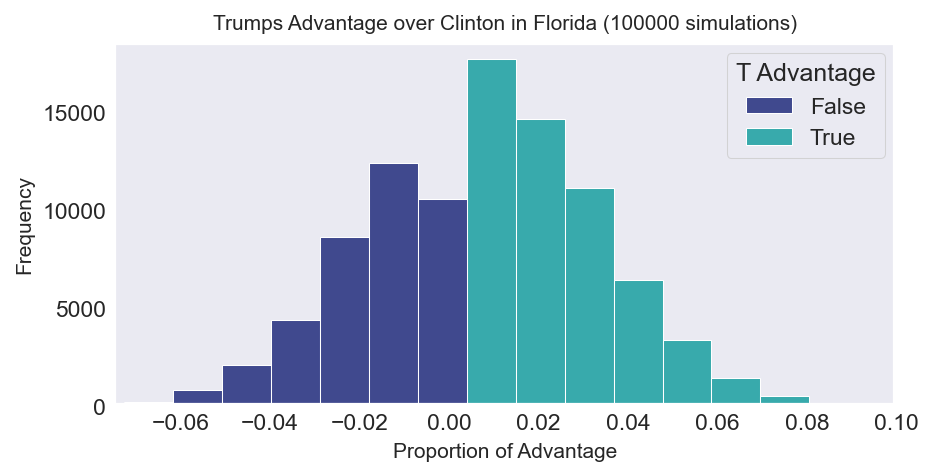

In [98]:
sns.set_style('dark')
plt.figure(figsize=(6, 3))
plt.title(f'Trumps Advantage over Clinton in {state.capitalize()} ({iterations} simulations)', fontsize = 10)
plt.xlabel('Proportion of Advantage', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.xlim([-0.075, 0.1])
sns.histplot(
    data = sim,
    x = 'T Advantage',
    hue = (sim['T Advantage'] > 0),
    palette = 'mako',
    bins = 20,
    alpha = 1,
)

plt.show()

#### Part 5

Now write a function `trump_wins(N)` that creates a sample of N voters for each of the four crucial states (Florida, Michigan, Pennsylvania, and Wisconsin) and returns 1 if Trump is predicted to win based on these samples and 0 if Trump is predicted to lose.

Recall that for Trump to win the election, he must either:
* Win the state of Florida and 1 or more other states
* Win Michigan, Pennsylvania, and Wisconsin

<!--
BEGIN QUESTION
name: q6e
manual: false
points: 2
-->

In [138]:
def trump_wins(N):
    sample_N = pd.DataFrame({
        'State': ["Florida", "Michigan", "Pennsylvania", "Wisconsin"],
    })
    predicted_sample = sample_N.apply(lambda row: draw_state_sample(N, row['State'].lower()), axis=1)
    sample_N["Predicted voters"] = predicted_sample
    sample_N[['Trump', 'Clinton', 'Other']] = sample_N['Predicted voters'].apply(pd.Series)
    sample_N = sample_N.drop(columns=['Predicted voters'])
    sample_N['Trump wins'] = (sample_N['Trump'] >= sample_N['Clinton']).astype(int)
    return sample_N

N = int(input('Enter the sample size:'))
trump_wins(N)

,State,Trump,Clinton,Other,Trump wins
0,Florida,539,432,29,1
1,Michigan,472,476,52,0
2,Pennsylvania,457,485,58,0
3,Wisconsin,468,476,56,0


In [128]:
sample_N = pd.DataFrame({
    'State': ["Florida", "Michigan", "Pennsylvania", "Wisconsin"],
    })
    predicted_sample = sample_N.apply(lambda row: draw_state_sample(N, row['State'].lower()), axis=1)
predicted_sample

0    [47, 51, 2]
1    [44, 47, 9]
2    [46, 48, 6]
3    [50, 46, 4]
dtype: object

In [ ]:
def trump_wins(N):
    pa = trump_advantage(draw_state_sample(N, 'pennsylvania'))
    fl = trump_advantage(draw_state_sample(N, 'florida'))
    mi = trump_advantage(draw_state_sample(N, 'michigan'))
    wn = trump_advantage(draw_state_sample(N, 'wisconsin'))
    if (fl > 0 and (mi > 0 or pa > 0 or wn > 0)) or (mi > 0 and pa > 0 and wn > 0):
        return 1
    else:
        return 0

In [ ]:
ok.grade("q6e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Part 6

If we repeat 100,000 simulations of the election, i.e. we call `trump_wins(1500)` 100,000 times, what proportion of these simulations predict a Trump victory? Give your answer as `percent_trump`.

This number represents the percent chance that a given sample will correctly predict Trump's victory *even if the sample was collected with absoutely no bias*. 

**Note: Many laypeople, even well educated ones, assume that this number should be 1. After all, how could a non-biased sample be wrong? This is the type of incredibly important intuition we hope to develop in you throughout this class and your future data science coursework.**

<!--
BEGIN QUESTION
name: q6f
manual: false
points: 1
-->

In [ ]:
percent_trump = sum([trump_wins(1500) for i in range(100000)])/100000
percent_trump

0.69273

In [ ]:
ok.grade("q6f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



We have just studied the sampling error, and found how 
our predictions might look if there was no bias in our 
sampling process. 
Essentially, we assumed that the people surveyed didn't change their minds, 
didn't hide who they voted for, and were representative
of those who voted on election day.

---
## Simulation Study of Selection Bias

According to an article by Grotenhuis, Subramanian, Nieuwenhuis, Pelzer and Eisinga (https://blogs.lse.ac.uk/usappblog/2018/02/01/better-poll-sampling-would-have-cast-more-doubt-on-the-potential-for-hillary-clinton-to-win-the-2016-election/#Author):

"In a perfect world, polls sample from the population of voters, who would state their political preference perfectly clearly and then vote accordingly."

That's the simulation study that we just performed. 


It's difficult to control for every source of selection bias.
And, it's not possible to control for some of the other sources of bias.

Next we investigate the effect of small sampling bias on the polling results in these four battleground states.  

Throughout this problem, we'll examine the impacts of a 0.5 percent bias in favor of Clinton in each state. Such a bias has been suggested because highly educated voters tend to be more willing to participate in polls.

### Question 7

Throughout this problem, adjust the selection of voters so that there is a 0.5% bias in favor of Clinton in each of these states. 

For example, in Pennsylvania, Clinton received 47.46 percent of the votes and Trump 48.18 percent. Increase the population of Clinton voters to 47.46 + 0.5  percent and correspondingly decrease the percent of Trump voters. 

#### Part 1

Simulate Trump's advantage across 100,000 simple random samples of 1500 voters for the state of Pennsylvania and store the results of each simulation in a list called `biased_simulations`.

That is, `biased_simulation[i]` should hold the result of the `i`th simulation.

That is, your answer to this problem should be just like your answer from Question 7 part 3, but now using samples that are biased as described above.

<!--
BEGIN QUESTION
name: q7a
points: 1
-->

In [ ]:
def draw_biased_state_sample(N, state):
    if state == 'florida':
        return np.random.multinomial(N , [0.4902 - 0.005, 0.4782 + 0.005, 1-(0.4902 + 0.4782)])
    if state == 'michigan':
        return np.random.multinomial(N , [0.475 - 0.005, 0.4727 + 0.005, 1 - (0.475 + 0.4727)])
    if state == 'pennsylvania':
        return np.random.multinomial(N , [0.4818 - 0.005, 0.4746 + 0.005, 1 - (0.4818 + 0.4746)])
    if state == 'wisconsin':
        return np.random.multinomial(N , [0.4722 - 0.005, 0.4645 + 0.005, 1 - (0.4722 + 0.4645)])
    
biased_simulations = [trump_advantage(draw_biased_state_sample(1500, 'pennsylvania')) for i in range(100000)]

In [ ]:
ok.grade("q7a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



#### Part 2

Make a histogram of the new sampling distribution of Trump's advantage now using these biased samples. That is, your histogram should be the same as in Q6.4, but now using the biased samples.

Make sure to give your plot a title and add labels where appropriate.


<!--
BEGIN QUESTION
name: q7b
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Frequency')

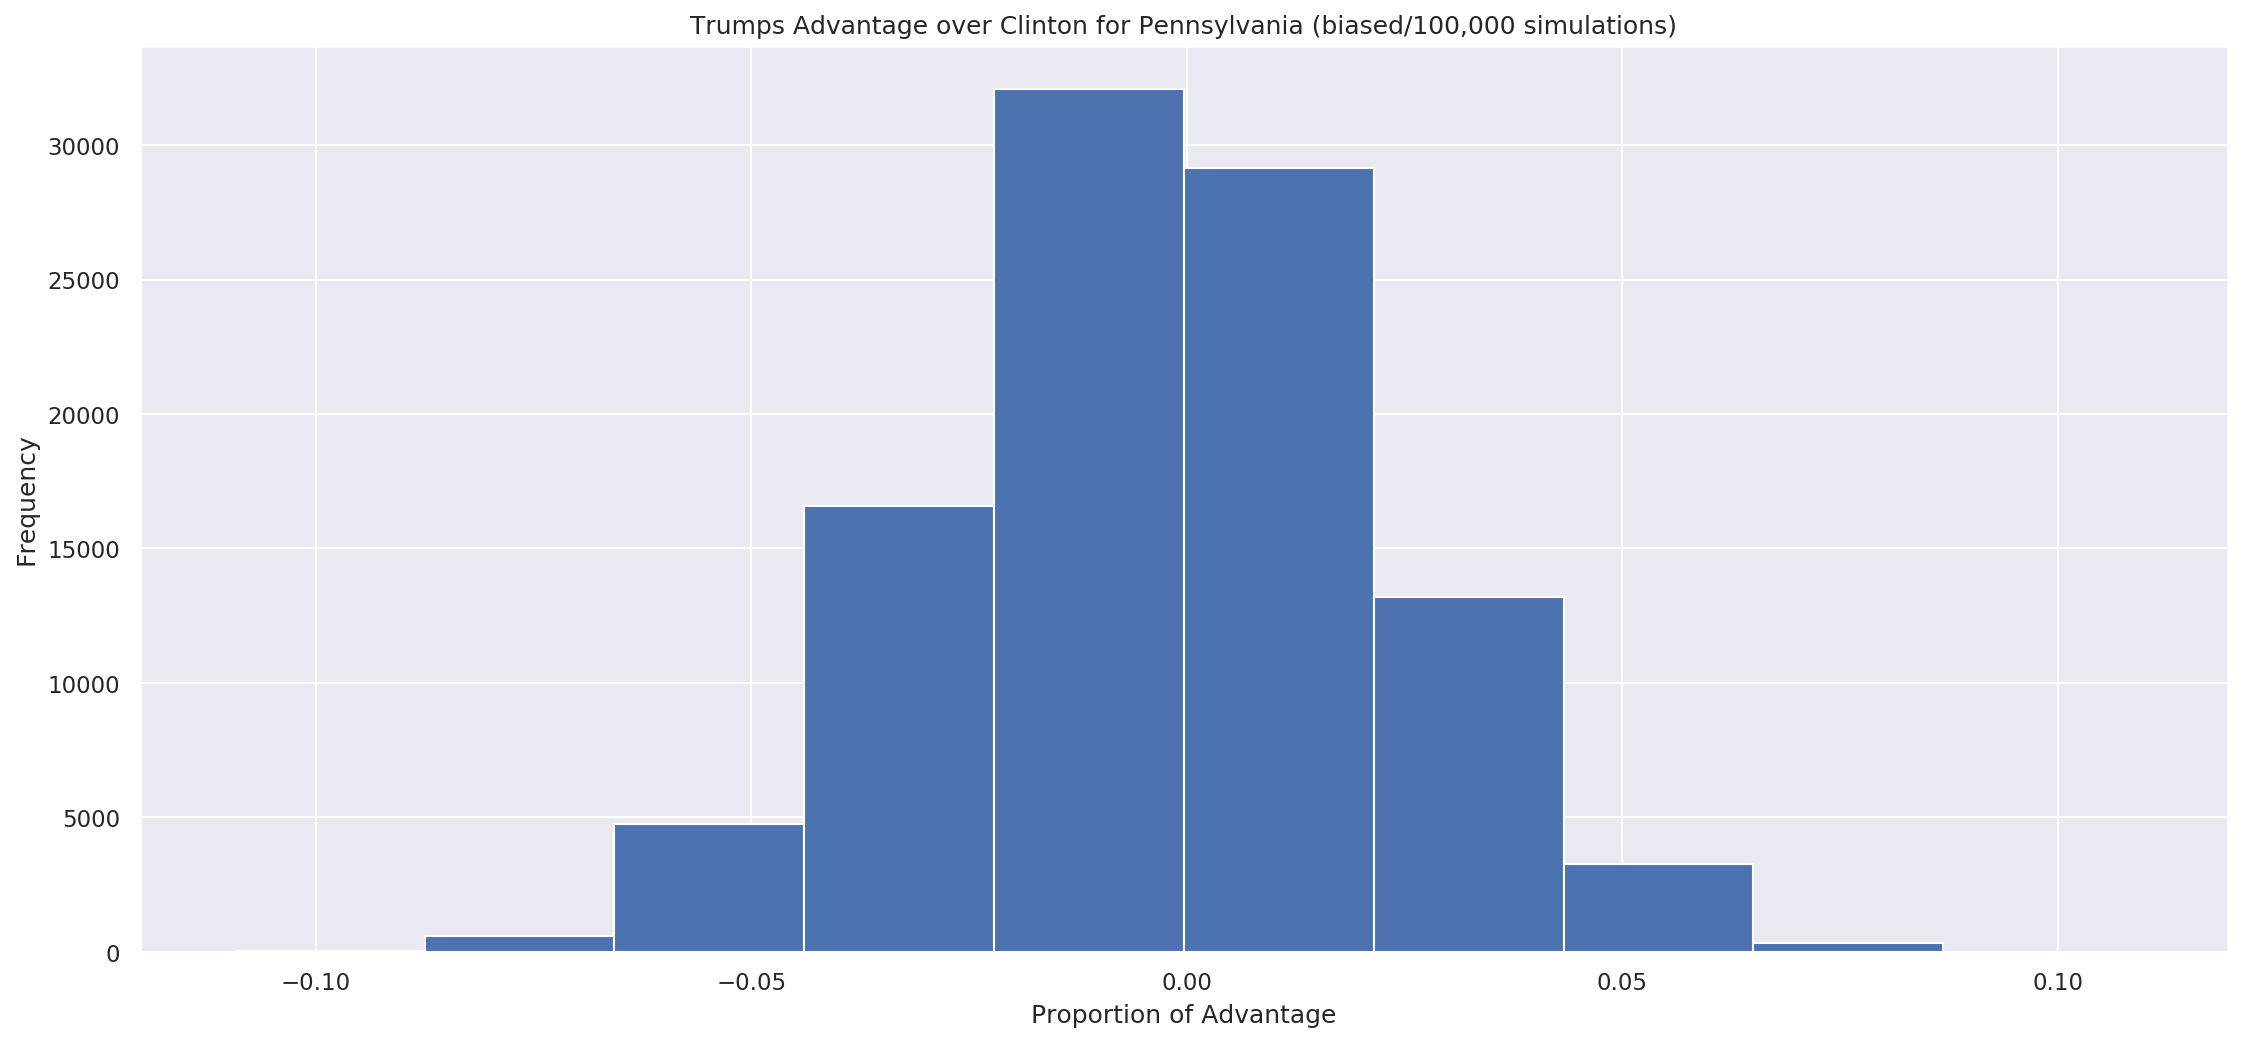

In [ ]:
plt.hist(biased_simulations)
plt.title('Trumps Advantage over Clinton for Pennsylvania (biased/100,000 simulations)')
plt.xlabel('Proportion of Advantage')
plt.ylabel('Frequency')

(array([1.5000e+01, 3.1600e+02, 3.0770e+03, 1.3322e+04, 2.9805e+04,
        3.1426e+04, 1.7010e+04, 4.3830e+03, 6.0400e+02, 4.2000e+01]),
 array([-0.10533333, -0.08333333, -0.06133333, -0.03933333, -0.01733333,
         0.00466667,  0.02666667,  0.04866667,  0.07066667,  0.09266667,
         0.11466667]),
 <a list of 10 Patch objects>)

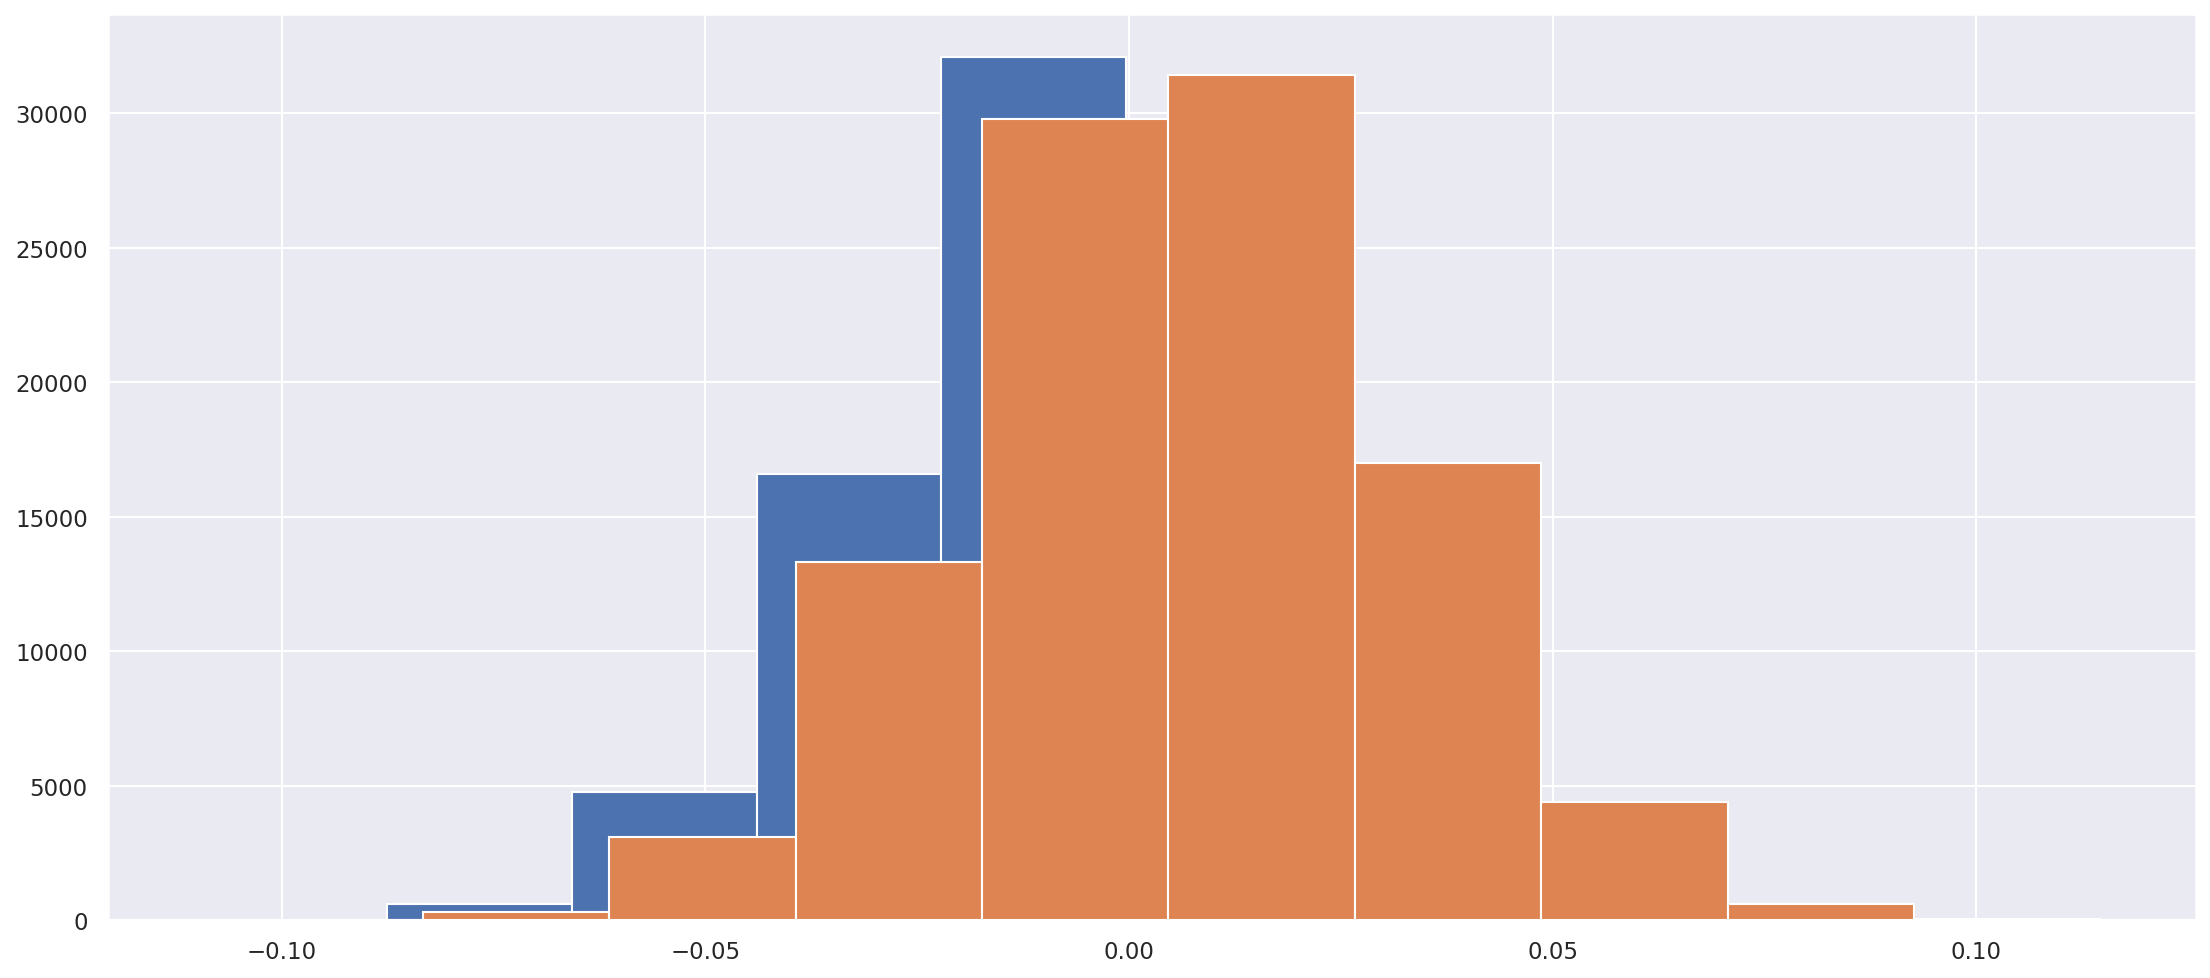

In [ ]:
plt.hist(biased_simulations) #Q6
plt.hist(simulations) #Q7

#### Part 3

Compare the histogram you created in Q7.2 to that in Q6.4. 

<!--
BEGIN QUESTION
name: q7c
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

The histogram shifted left from the one is question 6. The highest frequency of proportions was above 0 and now it is below 0.

#### Part 4

Now perform 100,000 simulations of all four states and return the proportion of these simulations that result in a Trump victory. This is the same fraction that you computed in Q6.6, but now using your biased samples.

Give your answer as `percent_trump_biased`.

This number represents the chance that a sample biased 0.5% in Hillary Clinton's favor will correctly predict Trump's victory. You should observe that the chance is signficantly lower than with an unbiased sample, i.e. your answer in Q6.6.

<!--
BEGIN QUESTION
name: q7d
manual: false
points: 1
-->

In [ ]:
def trump_wins_biased(N): 
    pa = trump_advantage(draw_biased_state_sample(N, 'pennsylvania'))
    fl = trump_advantage(draw_biased_state_sample(N, 'florida'))
    mi = trump_advantage(draw_biased_state_sample(N, 'michigan'))
    wn = trump_advantage(draw_biased_state_sample(N, 'wisconsin'))
    if (fl > 0 and (mi > 0 or pa > 0 or wn > 0)) or (mi > 0 and pa > 0 and wn > 0):
        return 1
    else:
        return 0

percent_trump_biased = sum([trump_wins_biased(1500) for i in range(100000)])/100000
percent_trump_biased

0.46483

## Further Study


### Question 8

Would increasing the sample size have helped?

#### Part 1

Try a sample size of 5,000 and run 100,000 simulations of a sample with replacement. What proportion of the 100,000 times is Trump predicted to win the election in the unbiased setting? In the biased setting?

Give your answers as `high_sample_size_unbiased_percent_trump` and `high_sample_size_biased_percent_trump`.

<!--
BEGIN QUESTION
name: q8a
manual: false
points: 1
-->

In [ ]:
high_sample_size_unbiased_percent_trump = sum([trump_wins(5000) for i in range(100000)])/100000
high_sample_size_biased_percent_trump = sum([trump_wins_biased(5000) for i in range(100000)])/100000
print(high_sample_size_unbiased_percent_trump, high_sample_size_biased_percent_trump)

0.82724 0.44625


In [ ]:
ok.grade("q8a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Part 2

What do your observations from part 1 say about the impact of sample size
on the sampling error and on the bias?   

Extra question for those who are curious: Just for fun, you might find it interesting to see what happens with even larger sample sizes (> 5000 voters) for both the unbiased and biased cases. Can you get them up to 99% success with sufficient large samples? How many? Why or why not? If you do this, include your observations in your answer.

In [ ]:
# Feel free to use this cell for any scratch work (creating visualizations, examining data, etc.)
higher_sample_size_unbiased_percent_trump =  sum([trump_wins(100000) for i in range(100000)])/100000
higher_sample_size_biased_percent_trump =  sum([trump_wins_biased(100000) for i in range(100000)])/100000
print(higher_sample_size_unbiased_percent_trump, higher_sample_size_biased_percent_trump)

0.99998 0.27562


Write your answer in the cell below.

<!--
BEGIN QUESTION
name: q8b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Increasing the same size leads to more unbiased predictions for trump to win and less biased predictions for trump to win. Using a sample sive of 100, 000, we can see the the proportion of unbiased predictions for trump winning are so high that python has rounded the number to 1 (100% chance of him winning). In contrast, his biased chance of winning has dropped significantly to about 27%. Therefore, Thus, increasing sample size reduces sampling error and increases bias/the effect of bias.

### Question 9

According to FiveThirtyEight: "... Polls of the November 2016 presidential election were about as accurate as polls of presidential elections have been on average since 1972."

When the margin of victory may be relatively small as it was in 2016, why don't polling agencies simply gather significantly larger samples to bring this error close to zero?

<!--
BEGIN QUESTION
name: q9
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Gathering larger samples requires a large amount of money/time/other resources that polling agencies may not have available for this purpose. Moreover, the error and/or bias could be due to the time of polling (events that happen after the poll and before elections change minds of people), lying (people in democrat-majority states afraid to admit that they support a republican), sampling method (e.g. if it is through phone calls then only more well-off people have phones and so part of the population is systematically excluded), etc. and such things cannot be amended through use of a higher sample size.

## Submission

**Important**: To make sure the test cases run correctly, click `Kernel>Restart & Run All` and make sure all of the test cases are still passing. Doing so will submit your code for you. 

You may submit this assignment as many times as you'd like before the deadline.

**You must restart and run all cells before submitting. Otherwise, you may pass test cases locally, but not on our servers. We will not entertain regrade requests of the form, “my code passed all of my local test cases, but failed the autograder”.**